In [12]:
from pya import Asig, Aserver, Aspec, Astft, Ugen
import numpy as np

In [20]:
s = Aserver()
s.boot()

AServer: sr: 44100, blocksize: 256,
         Stream Active: True, Device: Built-in Output, Index: 1

In [10]:
asig = Asig(44100, sr=44100, channels=3, label='test', cn=['left', 'right', 'center'])

In [14]:
sig = np.sin(2*np.pi*440*np.linspace(0,1, 44100))

In [27]:
asig = Asig(sig, sr=44100)
asig2 = Asig(sig, sr=44100)

In [30]:
sig = asig.sig

In [32]:
sig

array([ 0.0000000e+00,  6.2649742e-02,  1.2505335e-01, ...,
       -1.2505335e-01, -6.2649742e-02,  6.2761340e-14], dtype=float32)

In [26]:
asig[1000:4000].stereo().play(server=s)

Asig('_arrayindexed_to_stereo'): 2 x 3000 @ 44100Hz = 0.068s cn=['l', 'r']

In [37]:
np.abs(asig.to_spec().rfftspec)

array([4.3399632e-07, 2.2611707e-03, 4.5439838e-03, ..., 3.1354718e-02,
       3.1337060e-02, 3.1354368e-02], dtype=float32)

Astft('_stft'): 1 x 44100 @ 44100 Hz = 1.000 s

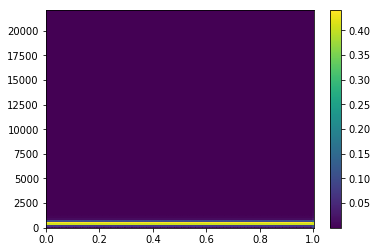

In [38]:
asig.to_stft().plot()

In [46]:
a = Ugen().sine(440, amp=.5, dur=0.5)
b = Ugen().noise(amp=0.1, dur=0.5)
c = Asig(1)

In [47]:
c

Asig(''): 1 x 1 @ 44100Hz = 0.000s cn=['0']

In [48]:
c.x[0:] = a

In [53]:
c.x[-1:] = b

Asig(''): 1 x 44099 @ 44100Hz = 1.000s cn=['0']

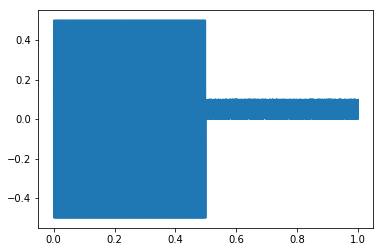

In [54]:
c.plot()